In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image

from sklearn.preprocessing import normalize, StandardScaler

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [2]:
def vector_scale(vector):
    
    v = (vector - vector.min())/np.abs(vector.max()- vector.min())
    
    return v

In [3]:
def vector_adjust(vector):
    
    for index, value in np.ndenumerate(vector):
        
        if value < 0:
            vector[index]=0
            
        elif value > 255:
            vector[index]=255
                
    return vector
    

In [4]:
def conv_step(m_x_slice, m_filter):
    
    r = np.multiply(m_x_slice, m_filter)
    r = np.sum(r, axis=0)
    r = np.sum(r, axis=0)
    return r.reshape((1,1,3))

In [5]:
def rgb_step(m_x_slice, m_filter):
    
    r = np.multiply(m_x_slice, m_filter)
    r = np.sum(r, axis=0)/3
    r = np.sum(r, axis=0)/3
    return r.reshape((1,1,3))

In [6]:
def forward_adjust(x, filtr, stride=1, mode= "rgb"):
    
    f_h = filtr.shape[1]
    x_h = x.shape[1]
    
    f_v = filtr.shape[0]
    x_v = x.shape[0]

    f_c = filtr.shape[2]
    x_c = x.shape[2]
    
    n_conv_h = np.floor(np.divide((x_h - f_h),stride)+1).astype("int")
    n_conv_v = np.floor(np.divide((x_v - f_v),stride)+1).astype("int")
    
    conv = np.zeros((int(n_conv_v), int(n_conv_h)))
    conv = np.stack([conv, conv, conv], -1)
    
    for v in range(n_conv_v):
        for h in range(n_conv_h):

            v_index = v * stride
            h_index = h * stride
            x_slice = x[ v_index : v_index+f_v , h_index : h_index+f_h, :]
            
            if mode == "conv":
                
                temp = conv_step( x_slice, filtr)
                temp = vector_adjust(temp)
                conv[v,h] = temp
                
            elif mode == "rgb":
                conv[v,h] =rgb_step( x_slice, filtr)
    return conv

In [107]:
# path = "/Users/haitham/Desktop/95454847_518658062160227_7455233713052319744_o.jpg"
path = "/Users/haitham/Desktop/95561786_518658108826889_5403235868171304960_o.jpg"
# path = "/Users/haitham/Desktop/Aspetar.jpg"
# path = "/Users/haitham/Desktop/98187230_525180234841343_7111580958653939712_o.jpg"
# path = "/Users/haitham/Desktop/download.jpeg"
# path = "/Users/haitham/Desktop/joker-2019-movie-iphone-x-wallpaper-ilikewallpaper_com_200.jpg"
# path = "/Users/haitham/Desktop/Joker-2019-Full-Movie-Poster.jpg"
# path = "/Users/haitham/Desktop/IMG_0355.jpg"

In [108]:
ffr = np.ones((3,3)) *1.2
ffg = np.ones((3,3)) *.7
ffb = np.ones((3,3)) *.7

rgb_filter = np.stack([ffr,ffg,ffb],-1)


f_sharpen= np.array([[0, -1, 0],[-1, 5, -1],[0,-1,0]]) 
f_sharpen = np.repeat(f_sharpen[:,:, np.newaxis],3,-1)


f_outline= np.array([[-1, -1, -1],[-1, 8, -1],[-1,-1,-1]])
f_outline = np.repeat(f_outline[:,:, np.newaxis],3,-1)


f_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
f_emboss = np.repeat(f_emboss[:,:,np.newaxis],3,-1)

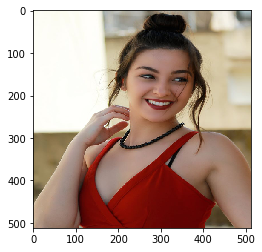

In [109]:
img = tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(512,512,3),
    interpolation='nearest'
)

# img = Image.open(path)

# img_arry = img_to_array(img)

img_arry = np.asarray(img)

plt.imshow(img_arry)


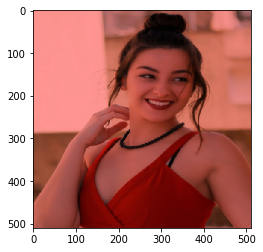

In [110]:
rgb = forward_adjust(img_arry, rgb_filter, mode="rgb")

rgb = array_to_img(rgb)

plt.imshow(rgb)

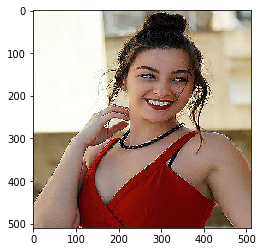

In [111]:
shrpn = forward_adjust(img_arry, f_sharpen, mode="conv")

shrpn = array_to_img(shrpn, scale=True)
 
plt.imshow(shrpn)

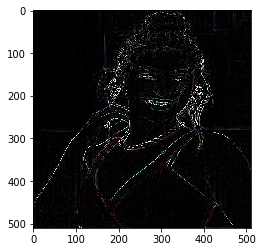

In [112]:
outline = forward_adjust(img_arry, f_outline, mode="conv")

outline = array_to_img(outline, scale= True)

plt.imshow(outline)

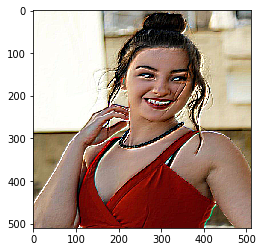

In [113]:
emboss = forward_adjust(img_arry, f_emboss, mode="conv")

emboss = array_to_img(emboss, scale=True)

plt.imshow(emboss)

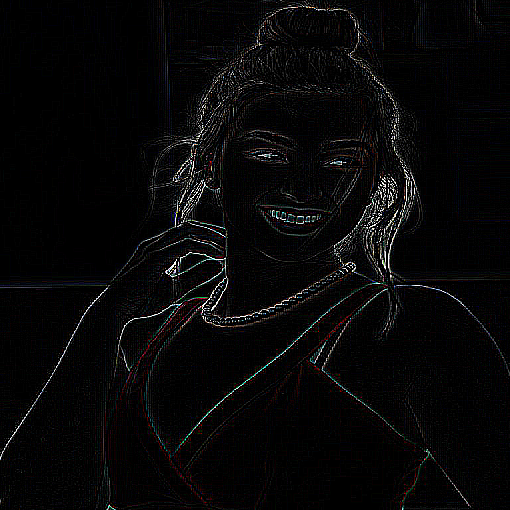

In [114]:
outline

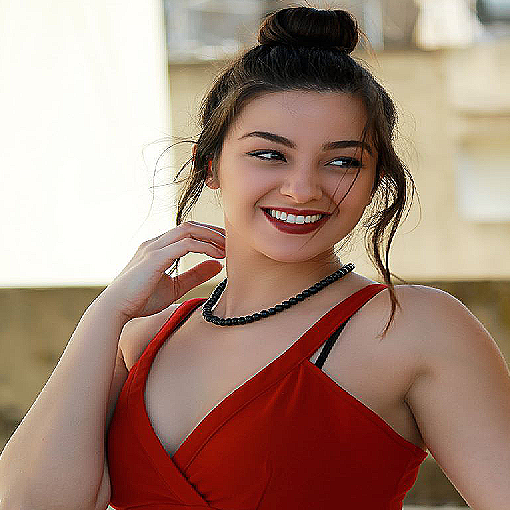

In [115]:
shrpn

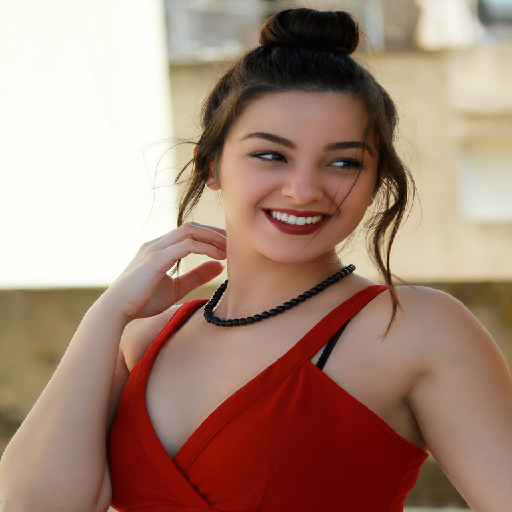

In [116]:
img

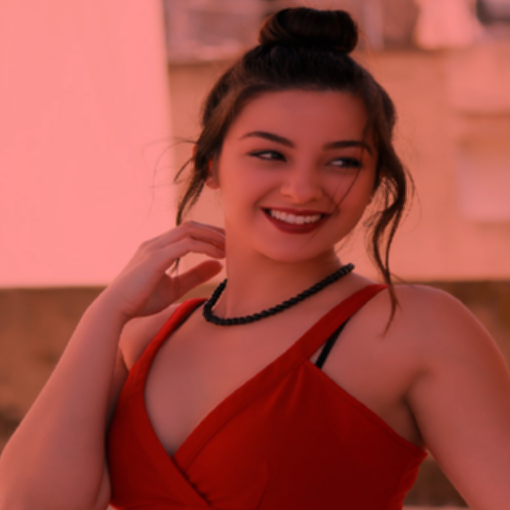

In [117]:
rgb

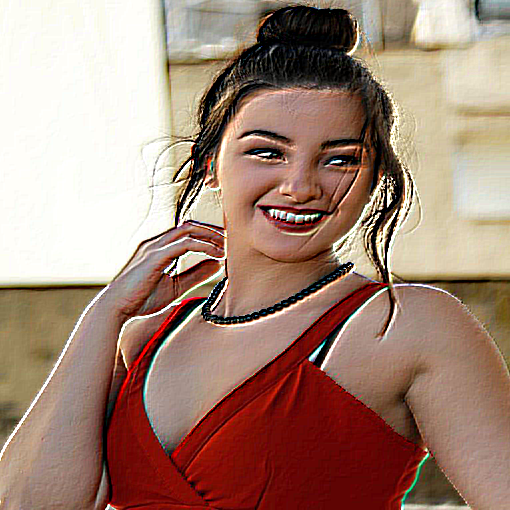

In [118]:
emboss

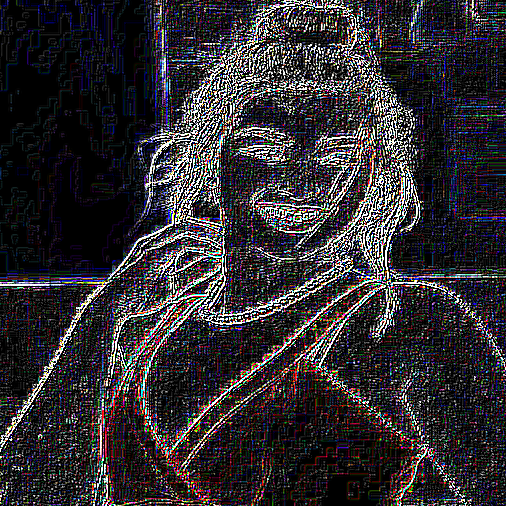

In [122]:
mult = forward_adjust(img_arry, f_sharpen, mode="conv")

mult = forward_adjust(mult, f_outline, mode="conv")

mult = forward_adjust(mult, f_emboss, mode="conv")

mult =array_to_img(mult)

mult